In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn import tree
from sklearn.metrics import confusion_matrix

# jupyter sugar
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# Gather data

In [3]:
gs = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()
len(train)
train.dtypes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


891

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data exploration

### Class imbalance

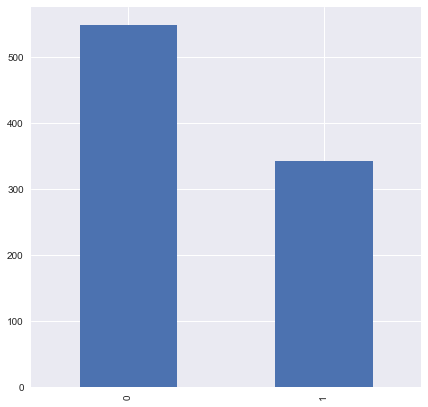

In [5]:
train['Survived'].value_counts().plot(
    kind='bar',
    figsize=(7, 7)
);

# Data clean and feature engineer

In [6]:
train['sex_binary'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
test['sex_binary'] = test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [7]:
def embarked_binary(emb):
    if emb == 'S':
        return 0
    elif emb == 'C':
        return 1
    elif emb == 'Q':
        return 2
    else:
        return 0

In [8]:
train['embarked_binary'] = train['Embarked'].apply(embarked_binary)
test['embarked_binary'] = test['Embarked'].apply(embarked_binary)

In [9]:
len(train[
    train['Age'].isnull()
])

177

Since there are many records with `null` value for `Age`, we will simply not use this feature for training the model.

In [10]:
features = [
    'Pclass',
    'sex_binary',
#     'Age',
    'SibSp',
    'Parch',
    'Fare',
    'embarked_binary'
]

# Train decision tree

In [11]:
dt = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=100
)

In [12]:
X = train[features].values

y = train['Survived'].values

In [13]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [14]:
test = pd.merge(
    left=test,
    right=gs,
    on='PassengerId',
    how='left'
)

### Accuracy of predictions

In [15]:
dt.score(test[features].dropna().values, test[features + ['Survived']].dropna()['Survived'].values)

0.86091127098321341

### Confusion matrix

In [16]:
conf = pd.DataFrame(confusion_matrix(
    y_true=test[features + ['Survived']].dropna()['Survived'].values,
    y_pred=dt.predict(test[features].dropna().values)
))

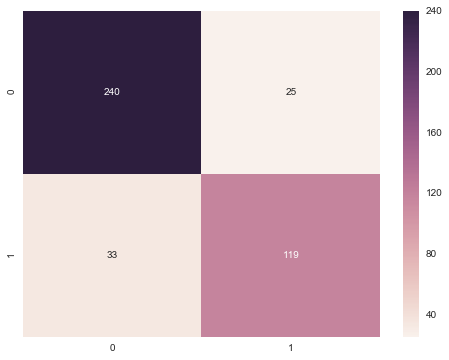

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    data=conf,
    ax=ax,
    annot=True,
    fmt='d'
);